In [51]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### I - Virat Kohli Dataset

In [52]:
df = pd.read_csv("virat.csv")

In [53]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [54]:
## Your code here
df['Runs'].describe()

count     132
unique     83
top         0
freq       10
Name: Runs, dtype: object

In [55]:
df.dtypes

Runs          object
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

In [56]:
df['Runs'].value_counts()

0       10
2        5
31       4
37       4
12       4
        ..
38       1
86*      1
23*      1
154*     1
40       1
Name: Runs, Length: 83, dtype: int64

In [57]:
df['Mins'].value_counts()

-      6
11     4
9      4
82     3
128    3
      ..
66     1
148    1
110    1
12     1
179    1
Name: Mins, Length: 93, dtype: int64

In [58]:
df.Runs= df.Runs.apply(lambda r: int(r.replace("*", '')))

In [59]:
df.Runs.dtype

dtype('int64')

In [60]:
df['Runs'].describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


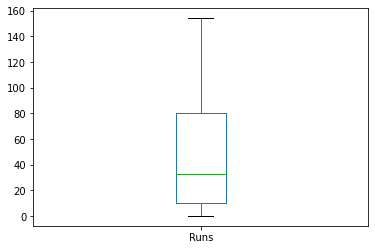

In [61]:
#Your code here
df.Runs.plot.box()
plt.show()

In [62]:
df.dtypes

Runs           int64
Mins          object
BF             int64
4s             int64
6s             int64
SR            object
Pos            int64
Dismissal     object
Inns           int64
Opposition    object
Ground        object
Start Date    object
dtype: object

In [63]:
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [64]:
df['Start Date'].dtype

dtype('<M8[ns]')

In [65]:
df['Year']= df['Start Date'].apply(lambda d: d.year)

In [66]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,2008


#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [67]:
df.groupby(by='Year').agg({'Opposition':'count'}).sort_values(by='Opposition', ascending=False)

,Opposition
Year,
2011,31
2013,23
2014,17
2010,16
2012,11
2015,10
2016,10
2009,6
2008,5


In [68]:
## Your code here
df.groupby(by='Year').agg({'Runs':'mean'}).sort_values(by='Runs', ascending=False)

,Runs
Year,
2016,73.900000
2017,61.666667
2014,58.529412
2013,47.826087
2010,45.375000
2011,42.000000
2012,40.363636
2009,38.333333
2008,31.800000


In [69]:
df.groupby(by='Year').agg({'Runs':'max'}).sort_values(by='Runs', ascending=False)


,Runs
Year,
2016,154
2014,139
2015,138
2012,128
2017,122
2010,118
2011,117
2013,115
2009,107


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [70]:
df['Mins'].value_counts()

-      6
11     4
9      4
82     3
128    3
      ..
66     1
148    1
110    1
12     1
179    1
Name: Mins, Length: 93, dtype: int64

In [49]:
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

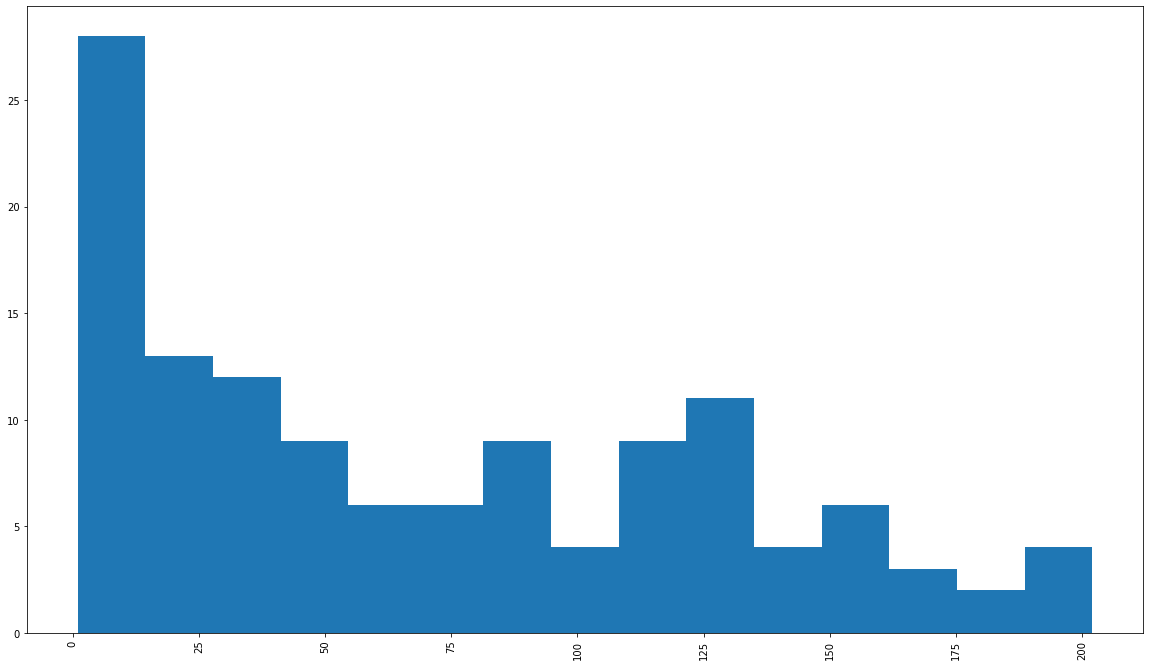

In [50]:
#Your code here
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3, hspace=0.1)
plt.hist(df2['Mins'], bins=15)
plt.show()